In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from concurrent.futures import ThreadPoolExecutor

In [2]:
# path to processed feature CSVs
feature_dir = "../audiofiles_processed_features_CSVs/"

# get the categories
with open("../scripts/categories.txt","r") as f:
    categories=f.read().split()

In [3]:
def load_features(category):
    """
    function to load features for a selected category
    """
    file_path = os.path.join(feature_dir, f"{category}_features.csv")
    df = pd.read_csv(file_path)
    return df

In [4]:
def load_combined_features():
    """
    Function to load and combine features for all categories
    """
    dataframes = []
    
    for category in categories:
        file_path = os.path.join(feature_dir, f"{category}_features.csv")
        df = pd.read_csv(file_path)

        # Add a column for category
        df["Category"] = category
        dataframes.append(df)

    return pd.concat(dataframes, ignore_index=True)

In [5]:
def plot_mfcc_radial(category):
    """
    Function to plot a MFCC radial chart
    """
    df = load_features(category)

    # Extract MFCC features (mean values across all audio samples)
    mfcc_cols = [col for col in df.columns if "mfcc" in col]
    mfcc_means = df[mfcc_cols].mean().values
    mfcc_max=df[mfcc_cols].max().values
    mfcc_min=df[mfcc_cols].min().values

    # Define angles for the radial plot
    angles = np.linspace(0, 2 * np.pi, len(mfcc_means), endpoint=False).tolist()
    angles += angles[:1]  # Close the circle

    # Repeat first value to close the circular shape
    mfcc_means = np.append(mfcc_means, mfcc_means[0])

    # Create the plot with better aesthetics
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    
    # Use a colormap for a smooth gradient effect
    cmap = plt.get_cmap("viridis")
    color = cmap(0.6)  # Pick a nice mid-color
    
    ax.fill(angles, mfcc_means, color=color, alpha=0.5)  # Soft fill
    ax.plot(angles, mfcc_means, color=color, linewidth=1, linestyle="-")  # Bolder outline
    
    # Fix tick label alignment
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([])
    
    # Dynamically adjust label angles
    # Adjust label angles to align along the tangent at each point
    for angle, label in zip(angles[:-1], mfcc_cols):
        rotation = np.degrees(angle) + 90  # Rotate perpendicular to radius (tangent)
        if 90 <= rotation <= 270:  # bottom-side labels (flip)
            rotation += 180

        ax.text(angle, 200 * 1.1, label, 
                ha="center", va="center", 
                fontsize=10, fontweight="bold", color="black", rotation=rotation)
        
    # Add numerical values near each point
    for angle, value in zip(angles[:-1], mfcc_means[:-1]):  # Skip last duplicate value
        ax.text(angle, value * 1.05, f"{value:.2f}", 
                ha="center", va="center", fontsize=7, fontweight="bold", 
                color="black")

    ax.set_yticklabels([])  # Hide radial grid labels

    ax.set_ylim(-400, 200)

    
    # Add a title with a stylish font
    ax.set_title(f"MFCC Radial Plot - {category}", fontsize=14, fontweight="bold", pad=20, color=color)

    # Save the enhanced plot

    output_path=f"../website/plots/mfcc_radial"
    os.makedirs(output_path,exist_ok=True)
    plot_filename = f"mfcc_radial_{category}.png"

    plt.savefig(f"{output_path}/{plot_filename}", dpi=300, bbox_inches="tight")
    print(f"Saved MFCC radial plot: {plot_filename}")

    plt.close()

In [6]:
for category in categories:
    plot_mfcc_radial(category)

Saved MFCC radial plot: mfcc_radial_applause.png
Saved MFCC radial plot: mfcc_radial_birds.png
Saved MFCC radial plot: mfcc_radial_car_horn.png
Saved MFCC radial plot: mfcc_radial_cat_meow.png
Saved MFCC radial plot: mfcc_radial_construction_noise.png
Saved MFCC radial plot: mfcc_radial_crowd_noise.png
Saved MFCC radial plot: mfcc_radial_dog_bark.png
Saved MFCC radial plot: mfcc_radial_drums.png
Saved MFCC radial plot: mfcc_radial_fireworks.png
Saved MFCC radial plot: mfcc_radial_footsteps.png
Saved MFCC radial plot: mfcc_radial_guitar.png
Saved MFCC radial plot: mfcc_radial_laughter.png
Saved MFCC radial plot: mfcc_radial_piano.png
Saved MFCC radial plot: mfcc_radial_rain_sounds.png
Saved MFCC radial plot: mfcc_radial_sirens.png
Saved MFCC radial plot: mfcc_radial_speech.png
Saved MFCC radial plot: mfcc_radial_thunder_sounds.png
Saved MFCC radial plot: mfcc_radial_traffic_sounds.png
Saved MFCC radial plot: mfcc_radial_train_sounds.png
Saved MFCC radial plot: mfcc_radial_wind_sounds.pn

In [7]:
def plot_3d_spectral_features():
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection="3d")

    colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))  # More distinct colors

    for category, color in zip(categories, colors):
        df = load_features(category)

        # Extract mean values for spectral features
        spectral_centroid = df["spectral_centroid"].mean()
        spectral_bandwidth = df["spectral_bandwidth"].mean()
        rms_energy = df["rms_energy"].mean()

        ax.scatter(spectral_centroid, spectral_bandwidth, rms_energy, 
                   color=color, label=category, s=100, edgecolor="black", alpha=0.8)

    # Labels and formatting
    ax.set_xlabel("Spectral Centroid", fontsize=12, fontweight="bold")
    ax.set_ylabel("Spectral Bandwidth", fontsize=12, fontweight="bold")
    ax.set_zlabel("RMS Energy", fontsize=12, fontweight="bold")
    ax.set_title("3D Spectral Feature Plot", fontsize=14, fontweight="bold", pad=20)

    # Legend outside
    ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

    # Save the plot
    output_path=f"../website/plots/spectral_3d_plot"
    os.makedirs(output_path,exist_ok=True)
    plot_filename = "spectral_3d_plot.png"
    plt.savefig(f"{output_path}/{plot_filename}", dpi=300, bbox_inches="tight")
    print(f"Saved 3D Spectral Feature Plot: {plot_filename}")

    plt.show()

Saved 3D Spectral Feature Plot: spectral_3d_plot.png


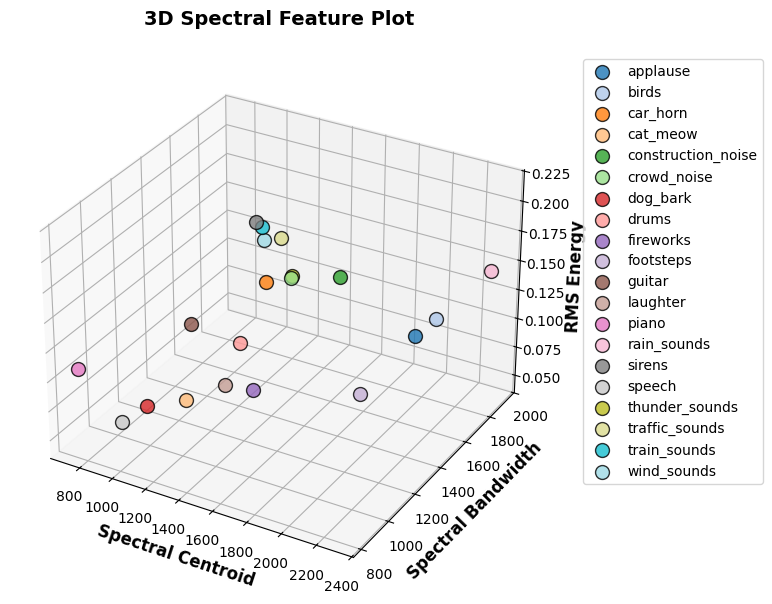

In [8]:
# Generate the plot
plot_3d_spectral_features()

In [9]:
def plot_chroma_heatmap():
    chroma_means = []

    for category in categories:
        df = load_features(category)

        # Extract mean chroma values for this category
        chroma_cols = [col for col in df.columns if "chroma" in col]
        chroma_values = df[chroma_cols].mean().values

        chroma_means.append(chroma_values)

    # Convert to DataFrame for heatmap
    chroma_df = pd.DataFrame(chroma_means, index=categories, columns=chroma_cols)

    # Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(chroma_df, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

    plt.title("Chroma Feature Heatmap", fontsize=14, fontweight="bold")
    plt.xlabel("Chroma Features", fontsize=12, fontweight="bold")
    plt.ylabel("Sound Categories", fontsize=12, fontweight="bold")

    # Save the plot
    plot_filename = "chroma_heatmap.png"
    output_path=f"../website/plots/chroma_heatmap"
    os.makedirs(output_path,exist_ok=True)
    plt.savefig(f"{output_path}/{plot_filename}", dpi=300, bbox_inches="tight")
    print(f"Saved Chroma Feature Heatmap: {plot_filename}")

    plt.show()

Saved Chroma Feature Heatmap: chroma_heatmap.png


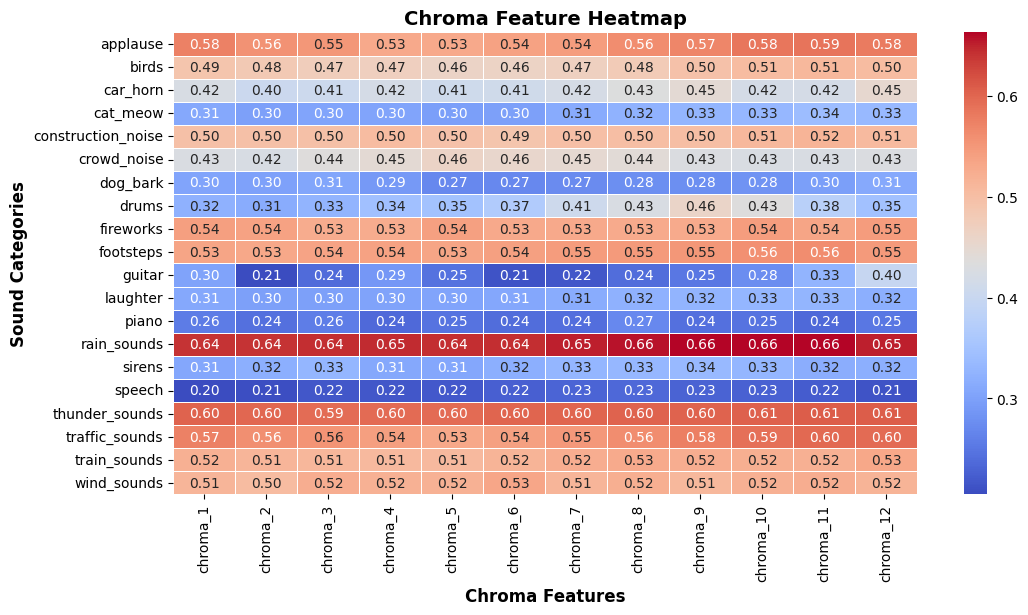

In [10]:
# Generate the plot
plot_chroma_heatmap()

In [11]:
base_dir = "../audiofiles_processed/"

# Function to compute spectrogram for a single file
def compute_spectrogram(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        D = np.abs(librosa.stft(y))  # Get magnitude spectrogram
        return D, sr
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None
    

# Function to plot the Average Spectrogram for a selected category
def plot_avg_spectrogram(category):
    category_path = os.path.join(base_dir, category)
    files = [f for f in os.listdir(category_path) if f.endswith(".wav")]

    if not files:
        print(f"No audio files found for category: {category}")
        return

    spectrograms = []
    sr = None

    # Use multi-threading to compute spectrograms in parallel
    with ThreadPoolExecutor(max_workers=8) as executor:  # Adjust workers based on CPU cores
        results = list(executor.map(compute_spectrogram, [os.path.join(category_path, file) for file in files]))

    # Collect valid spectrograms
    for spectrogram, sample_rate in results:
        if spectrogram is not None:
            spectrograms.append(spectrogram)
            sr = sample_rate  # Use the latest valid sample rate

    if not spectrograms:
        print(f"Error: No valid spectrograms computed for category: {category}")
        return

    # Compute the average spectrogram across all files
    avg_spectrogram = np.mean(spectrograms, axis=0)
    avg_spectrogram_db = librosa.amplitude_to_db(avg_spectrogram, ref=np.max)

    # Plot Spectrogram
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(avg_spectrogram_db, sr=sr, x_axis="time", y_axis="log", cmap="inferno")

    plt.title(f"Average Spectrogram for {category}", fontsize=14, fontweight="bold")
    plt.xlabel("Time (s)", fontsize=12, fontweight="bold")
    plt.ylabel("Frequency (Hz)", fontsize=12, fontweight="bold")
    plt.colorbar(label="Amplitude (dB)")

    # Save the plot    
    output_path=f"../website/plots/average_spectogram"
    os.makedirs(output_path,exist_ok=True)
    plot_filename = f"spectrogram_avg_{category}.png"

    plt.savefig(f"{output_path}/{plot_filename}", dpi=300, bbox_inches="tight")
    
    
    print(f"Saved Average Spectrogram Plot: {plot_filename}")

    plt.close()

In [12]:
for category in categories:
    plot_avg_spectrogram(category)

Saved Average Spectrogram Plot: spectrogram_avg_applause.png
Saved Average Spectrogram Plot: spectrogram_avg_birds.png
Saved Average Spectrogram Plot: spectrogram_avg_car_horn.png
Saved Average Spectrogram Plot: spectrogram_avg_cat_meow.png
Saved Average Spectrogram Plot: spectrogram_avg_construction_noise.png
Saved Average Spectrogram Plot: spectrogram_avg_crowd_noise.png
Saved Average Spectrogram Plot: spectrogram_avg_dog_bark.png
Saved Average Spectrogram Plot: spectrogram_avg_drums.png
Saved Average Spectrogram Plot: spectrogram_avg_fireworks.png
Saved Average Spectrogram Plot: spectrogram_avg_footsteps.png
Saved Average Spectrogram Plot: spectrogram_avg_guitar.png
Saved Average Spectrogram Plot: spectrogram_avg_laughter.png
Saved Average Spectrogram Plot: spectrogram_avg_piano.png
Saved Average Spectrogram Plot: spectrogram_avg_rain_sounds.png
Saved Average Spectrogram Plot: spectrogram_avg_sirens.png
Saved Average Spectrogram Plot: spectrogram_avg_speech.png
Saved Average Spectro

In [13]:
def plot_time_series(category):
    feature_name="rms_energy"
    plt.figure(figsize=(12, 6))

    # for category in categories:
    df=load_features(category)

    # Take rolling mean to smooth fluctuations
    time_series = df[feature_name].rolling(window=5).mean()

    plt.plot(time_series, label=category, color="red", alpha=0.8)

    plt.title(f"Time-Series of {feature_name} for {category}", fontsize=14, fontweight="bold")
    plt.xlabel("Time (Frames)", fontsize=12, fontweight="bold")
    plt.ylabel(feature_name, fontsize=12, fontweight="bold")
    # plt.legend(loc="upper right")
    
    plt.ylim(0,0.65)
    # Save the plot
    output_path = "../website/plots/time_series_rms"
    os.makedirs(output_path, exist_ok=True)
    plot_filename = f"time_series_rms_{category}.png"
    plt.savefig(f"{output_path}/{plot_filename}", dpi=300, bbox_inches="tight")
    print(f"Saved Time-Series RMS Energy Plot: {output_path}/{plot_filename}")

    plt.close()

In [14]:
for category in categories:
    plot_time_series(category)

Saved Time-Series RMS Energy Plot: ../website/plots/time_series_rms/time_series_rms_applause.png
Saved Time-Series RMS Energy Plot: ../website/plots/time_series_rms/time_series_rms_birds.png
Saved Time-Series RMS Energy Plot: ../website/plots/time_series_rms/time_series_rms_car_horn.png
Saved Time-Series RMS Energy Plot: ../website/plots/time_series_rms/time_series_rms_cat_meow.png
Saved Time-Series RMS Energy Plot: ../website/plots/time_series_rms/time_series_rms_construction_noise.png
Saved Time-Series RMS Energy Plot: ../website/plots/time_series_rms/time_series_rms_crowd_noise.png
Saved Time-Series RMS Energy Plot: ../website/plots/time_series_rms/time_series_rms_dog_bark.png
Saved Time-Series RMS Energy Plot: ../website/plots/time_series_rms/time_series_rms_drums.png
Saved Time-Series RMS Energy Plot: ../website/plots/time_series_rms/time_series_rms_fireworks.png
Saved Time-Series RMS Energy Plot: ../website/plots/time_series_rms/time_series_rms_footsteps.png
Saved Time-Series RMS

In [15]:
# Function to plot Zero-Crossing Rate Histogram for a category
def plot_zcr_histogram(category):
    feature_name = "zero_crossing_rate"
    df = load_features(category)

    if feature_name not in df.columns:
        print(f"Feature '{feature_name}' not found in dataset for {category}. Skipping.")
        return

    plt.figure(figsize=(12, 6))

    # Plot histogram
    sns.histplot(df[feature_name], bins=30, kde=True, color="salmon", alpha=0.7)

    plt.title(f"Zero-Crossing Rate Histogram for {category}", fontsize=14, fontweight="bold")
    plt.xlabel("Zero-Crossing Rate", fontsize=12, fontweight="bold")
    plt.ylabel("Frequency", fontsize=12, fontweight="bold")
    plt.ylim(0,210)
    # Save the plot
    output_path = "../website/plots/zcr_histogram"
    os.makedirs(output_path, exist_ok=True)
    plot_filename = f"zcr_histogram_{category}.png"
    plt.savefig(f"{output_path}/{plot_filename}", dpi=300, bbox_inches="tight")
    print(f"Saved ZCR Histogram Plot: {output_path}/{plot_filename}")

    plt.close()


In [16]:
for category in categories:
    plot_zcr_histogram(category)

Saved ZCR Histogram Plot: ../website/plots/zcr_histogram/zcr_histogram_applause.png
Saved ZCR Histogram Plot: ../website/plots/zcr_histogram/zcr_histogram_birds.png
Saved ZCR Histogram Plot: ../website/plots/zcr_histogram/zcr_histogram_car_horn.png
Saved ZCR Histogram Plot: ../website/plots/zcr_histogram/zcr_histogram_cat_meow.png
Saved ZCR Histogram Plot: ../website/plots/zcr_histogram/zcr_histogram_construction_noise.png
Saved ZCR Histogram Plot: ../website/plots/zcr_histogram/zcr_histogram_crowd_noise.png
Saved ZCR Histogram Plot: ../website/plots/zcr_histogram/zcr_histogram_dog_bark.png
Saved ZCR Histogram Plot: ../website/plots/zcr_histogram/zcr_histogram_drums.png
Saved ZCR Histogram Plot: ../website/plots/zcr_histogram/zcr_histogram_fireworks.png
Saved ZCR Histogram Plot: ../website/plots/zcr_histogram/zcr_histogram_footsteps.png
Saved ZCR Histogram Plot: ../website/plots/zcr_histogram/zcr_histogram_guitar.png
Saved ZCR Histogram Plot: ../website/plots/zcr_histogram/zcr_histogra

In [17]:
def plot_feature_variability(feature_name):
    df = load_combined_features()

    if feature_name not in df.columns:
        print(f"Feature '{feature_name}' not found in dataset.")
        return

    plt.figure(figsize=(12, 6))
    sns.boxenplot(x="Category", y=feature_name, data=df, hue="Category",palette="coolwarm")

    plt.title(f"Feature Variability for {feature_name}", fontsize=14, fontweight="bold")
    plt.xlabel("Sound Categories", fontsize=12, fontweight="bold")
    plt.ylabel(feature_name, fontsize=12, fontweight="bold")
    plt.xticks(rotation=45)

    # Save the plot
    plot_filename = f"feature_variability_{feature_name}.png"
    output_path = "../website/plots/feature_variability"
    os.makedirs(output_path, exist_ok=True)
    plt.savefig(f"{output_path}/{plot_filename}", dpi=300, bbox_inches="tight")
    print(f"Saved Feature Variability Plot: {output_path}/{plot_filename}")

    plt.close()

In [18]:
for feature in ['zero_crossing_rate','spectral_centroid', 'spectral_bandwidth', 'rms_energy']:
    plot_feature_variability(feature)

Saved Feature Variability Plot: ../website/plots/feature_variability/feature_variability_zero_crossing_rate.png
Saved Feature Variability Plot: ../website/plots/feature_variability/feature_variability_spectral_centroid.png
Saved Feature Variability Plot: ../website/plots/feature_variability/feature_variability_spectral_bandwidth.png
Saved Feature Variability Plot: ../website/plots/feature_variability/feature_variability_rms_energy.png


In [5]:
df=load_combined_features()
df.columns

Index(['filename', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6',
       'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5',
       'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10',
       'chroma_11', 'chroma_12', 'spectral_contrast_1', 'spectral_contrast_2',
       'spectral_contrast_3', 'spectral_contrast_4', 'spectral_contrast_5',
       'spectral_contrast_6', 'spectral_contrast_7', 'zero_crossing_rate',
       'spectral_centroid', 'spectral_bandwidth', 'rms_energy', 'Category'],
      dtype='object')

In [9]:
def plot_mean_spectral_contrast():
    """
    Function to plot a lollipop chart for mean spectral contrast per category with C1- and C3o styling.
    """
    df = load_combined_features()

    # Extract spectral contrast columns and compute mean per category
    spectral_contrast_cols = [col for col in df.columns if "spectral_contrast" in col]
    df["mean_spectral_contrast"] = df[spectral_contrast_cols].mean(axis=1)

    # Compute mean spectral contrast per category
    category_means = df.groupby("Category")["mean_spectral_contrast"].mean().sort_values()

    # Create figure
    plt.figure(figsize=(12, 7))

    # Plot lollipop chart with desired style
    plt.stem(category_means.index, category_means.values, linefmt="C1-", markerfmt="C3o", basefmt="black")

    # Add labels to the dots
    for category, value in zip(category_means.index, category_means.values):
        plt.text(category, value + 0.5, f"{value:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")

    # Styling
    plt.xlabel("Category", fontsize=12, fontweight="bold")
    plt.ylabel("Mean Spectral Contrast", fontsize=12, fontweight="bold")
    plt.title("Mean Spectral Contrast per Category", fontsize=14, fontweight="bold")
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.ylim(10,25)

    # Save the plot
    output_path = "../website/plots/mean_spectral_contrast"
    os.makedirs(output_path, exist_ok=True)
    plot_filename = "mean_spectral_contrast_lollipop.png"
    plt.savefig(f"{output_path}/{plot_filename}", dpi=300, bbox_inches="tight")
    print(f"Saved Mean Spectral Contrast Lollipop Chart: {plot_filename}")

    plt.show()


Saved Mean Spectral Contrast Lollipop Chart: mean_spectral_contrast_lollipop.png


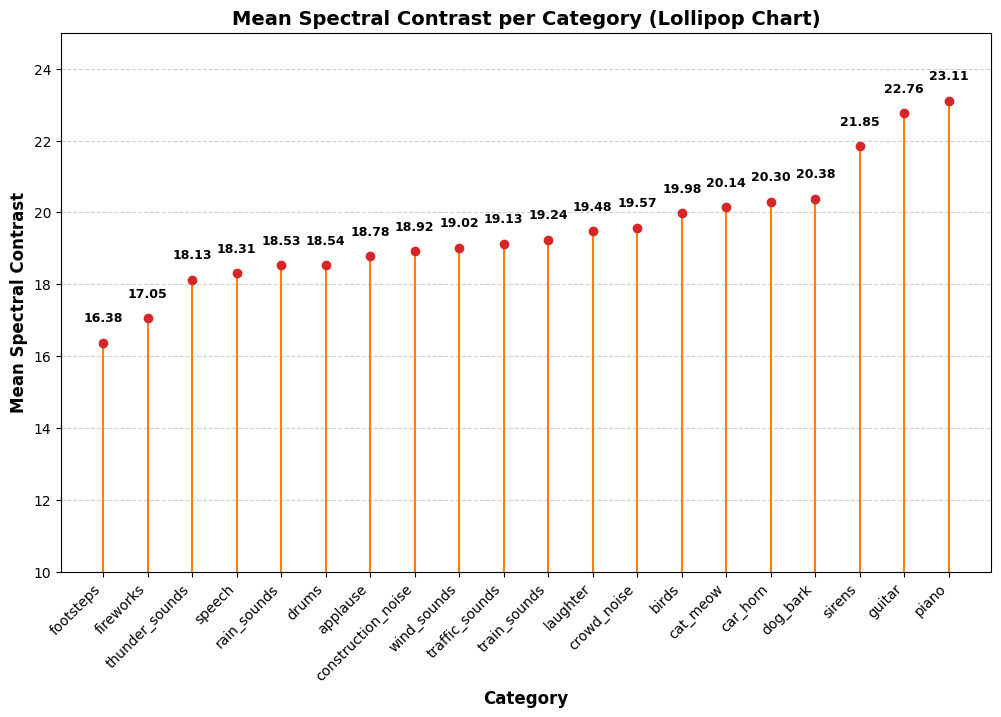

In [10]:
# Generate the plot
plot_mean_spectral_contrast()